# Exploratory data analysis

In [1]:
# !pip install regex
# !pip install wheel
# !apt-get install python3

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import collections
import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

In [3]:
df_reddit = pickle.load(open('../DataSet/df_reddit.pkl', 'rb'))
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA


In [4]:
df_reddit.shape

(12000, 10)

In [5]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        12000 non-null  object
 1   created_utc   12000 non-null  int64 
 2   domain        12000 non-null  object
 3   id            12000 non-null  object
 4   num_comments  12000 non-null  int64 
 5   over_18       12000 non-null  bool  
 6   post_hint     12000 non-null  object
 7   score         12000 non-null  int64 
 8   text_merged   12000 non-null  object
 9   subreddit     12000 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 855.6+ KB


## Exploratory data analysis on data.

* Count the number of words on text and add a new column with number of words.
* Apply sentiment analyzer on each text and add it as a new column.
* seperate the date and add it to data.

In [6]:
nltk.download('vader_lexicon')
# Mighani Approach:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])

df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

[nltk_data] Downloading package vader_lexicon to C:\Users\DASLAB
[nltk_data]     Hareland 3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df_reddit.shape

(12000, 13)

In [8]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author            12000 non-null  object        
 1   created_utc       12000 non-null  int64         
 2   domain            12000 non-null  object        
 3   id                12000 non-null  object        
 4   num_comments      12000 non-null  int64         
 5   over_18           12000 non-null  bool          
 6   post_hint         12000 non-null  object        
 7   score             12000 non-null  int64         
 8   text_merged       12000 non-null  object        
 9   subreddit         12000 non-null  object        
 10  word_count*       12000 non-null  int64         
 11  sentiment_score*  12000 non-null  float64       
 12  date              12000 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage:

Lets turn the subreddit column to numerical values.

In [9]:
df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
targets = df_reddit['target']

In [10]:
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA,4,0.0000,2020-01-19 05:55:05,1
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA,5,0.0000,2020-01-19 05:44:40,1
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA,4,0.3182,2020-01-19 05:08:27,1
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA,3,0.0000,2020-01-19 05:04:37,1
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA,8,0.4588,2020-01-19 03:35:39,1


Drop the column named domain below.

In [11]:
cols = ['domain', 'author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'date', 'subreddit']

df_reddit.drop(columns=cols, inplace = True)

In [12]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target
0,star shine saturn ring,4,0.0000,1
1,smithsonian nation air space museum,5,0.0000,1
2,incred expand crab nebula,4,0.3182,1
3,columbia readi st,3,0.0000,1
4,went ksc christma got see made interest spacef...,8,0.4588,1


In [13]:
print(df_reddit.groupby("target")["word_count*"].describe().T)

target            0            1
count   6000.000000  6000.000000
mean      16.488333    13.118500
std       38.869637    26.267733
min        1.000000     1.000000
25%        5.000000     4.000000
50%        8.000000     7.000000
75%       15.000000    11.000000
max     1005.000000   552.000000


In [14]:
print(df_reddit.groupby("target")["sentiment_score*"].describe().T)

target            0            1
count   6000.000000  6000.000000
mean       0.099742     0.104667
std        0.313117     0.293992
min       -0.996700    -0.972300
25%        0.000000     0.000000
50%        0.000000     0.000000
75%        0.226300     0.077200
max        0.998500     0.994000


Keep the track of nasa and space_discussion as follow.

In [15]:
sub_nasa_mask = df_reddit["target"] == 1
sub_space_mask = df_reddit["target"] == 0

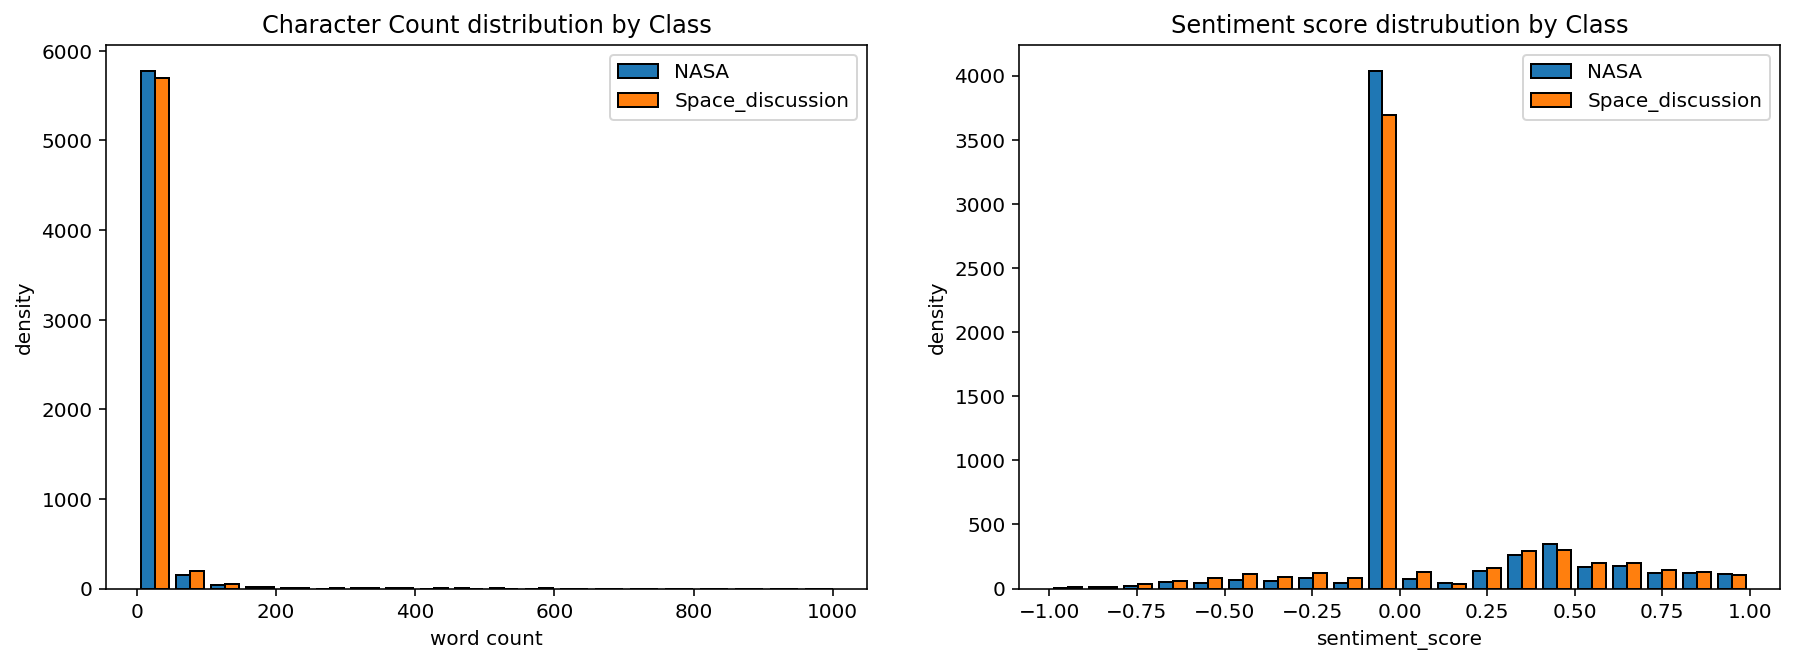

In [16]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['word_count*'], 
          df_reddit[sub_space_mask]['word_count*']],
          bins=20, ec='k', density=False)
plt.title('Character Count distribution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('word count'); plt.ylabel('density')


plt.subplot(1, 2, 2)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=20, ec='k', density=False)
plt.title('Sentiment score distrubution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')

plt.savefig("../Figures/distribution_plots.png")

Check out the corrolation between variables.

In [17]:
df_reddit_corr = df_reddit.corr()

In [18]:
df_reddit_corr

,word_count*,sentiment_score*,target
word_count*,1.000000,0.291378,-0.050731
sentiment_score*,0.291378,1.000000,0.008109
target,-0.050731,0.008109,1.000000


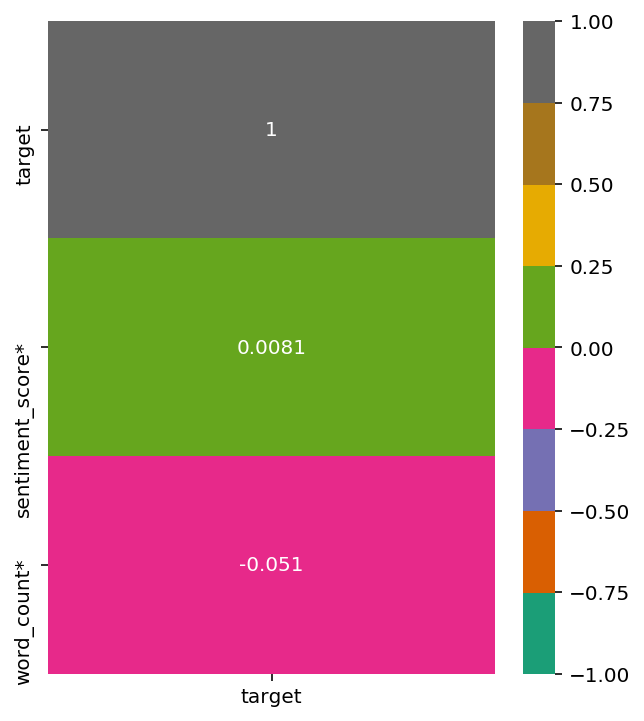

In [19]:
plt.figure(figsize=(5,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='Dark2',
            annot=True);

plt.savefig("../Figures/EDA_corr_plot.png")

## Let's count vectorize the data

* Add some stop words to the general list
* Apply the new list of stop words list (extend)
* Apply count vectorize to the data

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)

cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                       ngram_range=(1,2))

In [21]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

In [22]:
len(cvec.get_feature_names())

7813

In [23]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())
term_df.insert(0, 'targets', targets)

In [24]:
term_df.head()

,targets,aa,ab,ab secret,abandon,abc,abil,abl,abl build,abl captur,...,zealand,zero,zero graviti,zip,zone,zoom,zoom see,zubrin,zvezda,zvezda servic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# term_df.groupby('targets').mean().T

In [26]:
# term_df.groupby('targets').mean().T.sort_values(0, ascending=False)

In [27]:
top_words_nasa = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_space_dis = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

top_words_overlap = [word for word in top_words_space_dis if word in top_words_nasa]
top_words_overlap

['nasa',
 'space',
 'moon',
 'earth',
 'mar',
 'year',
 'launch',
 'like',
 'one',
 'first',
 'new',
 'amp',
 'time']

### Number of characters present in each sentence

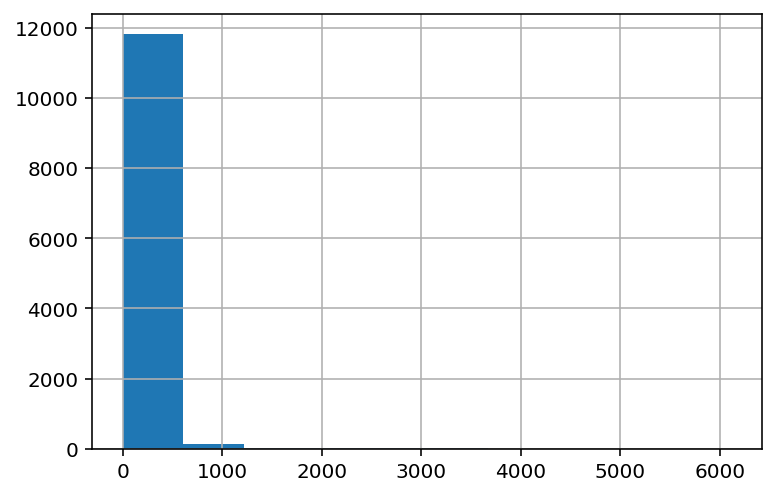

In [28]:
df_reddit['text_merged'].str.len().hist()
# plt.xscale('log')

### Average word length in each sentence

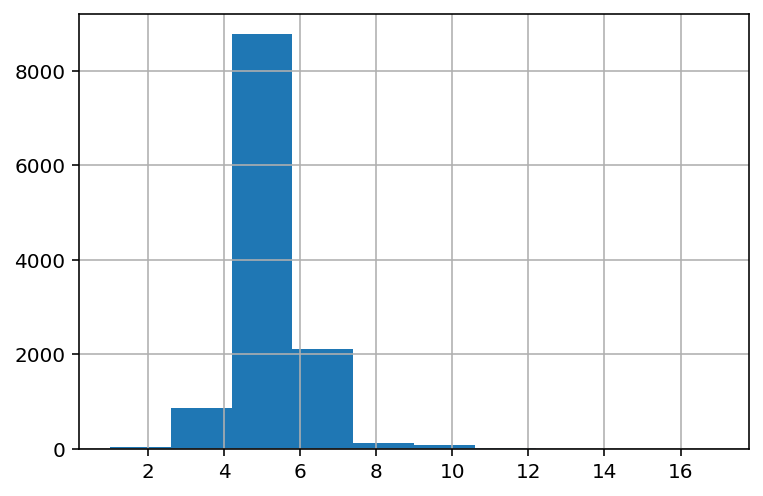

In [29]:
df_reddit['text_merged'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### Inspect which words other than stopwords occur frequently

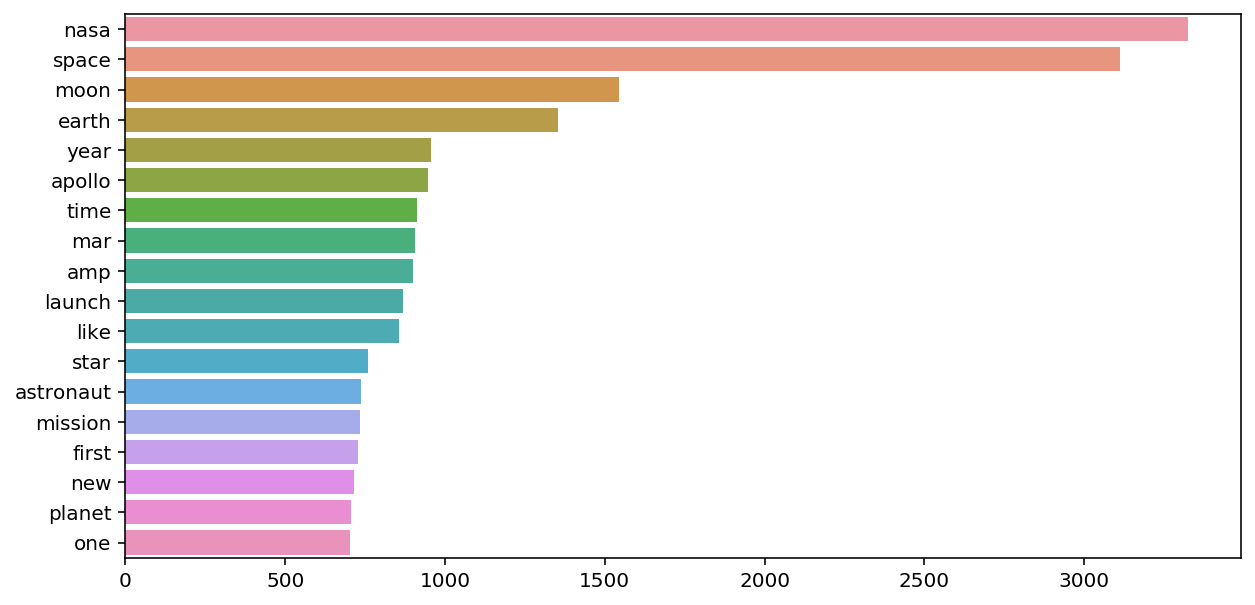

In [32]:
corpus=[]
new= df_reddit['text_merged'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1


plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:20]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
a = sns.barplot(x=y,y=x)

nasa, space, moon and earth are top words in comments.

### Looking at most frequent n-grams can give you a better understanding of the context 

In [33]:
from nltk.util import ngrams

### Bigrams

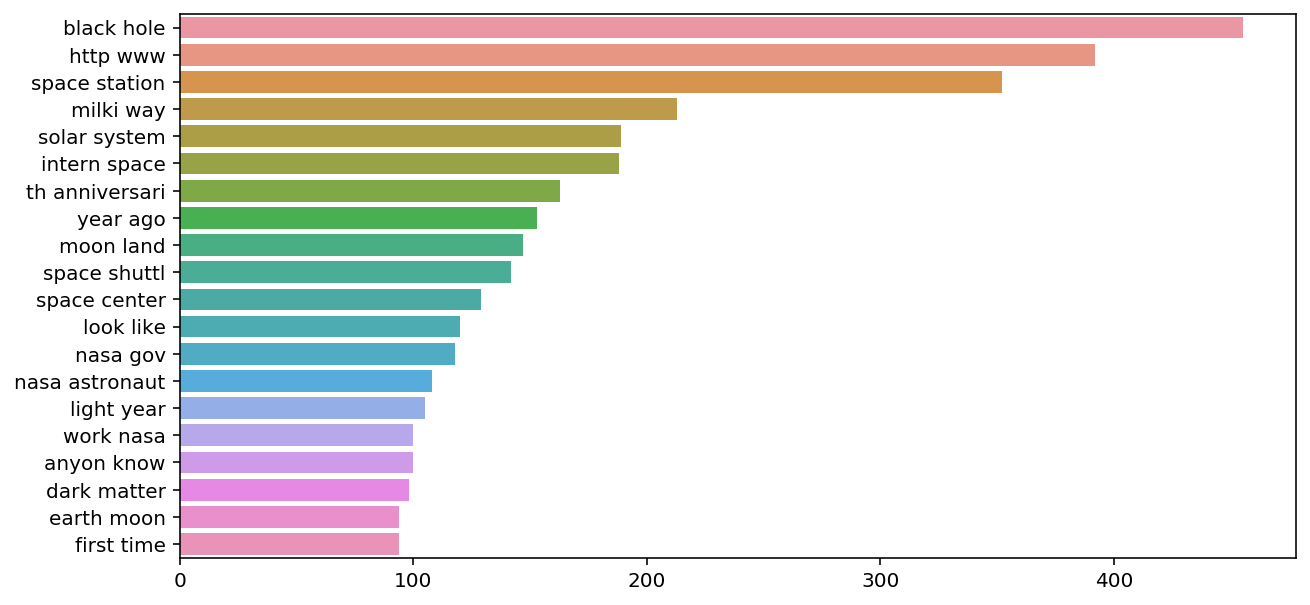

In [34]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=get_top_ngram(df_reddit['text_merged'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

### Trigrams

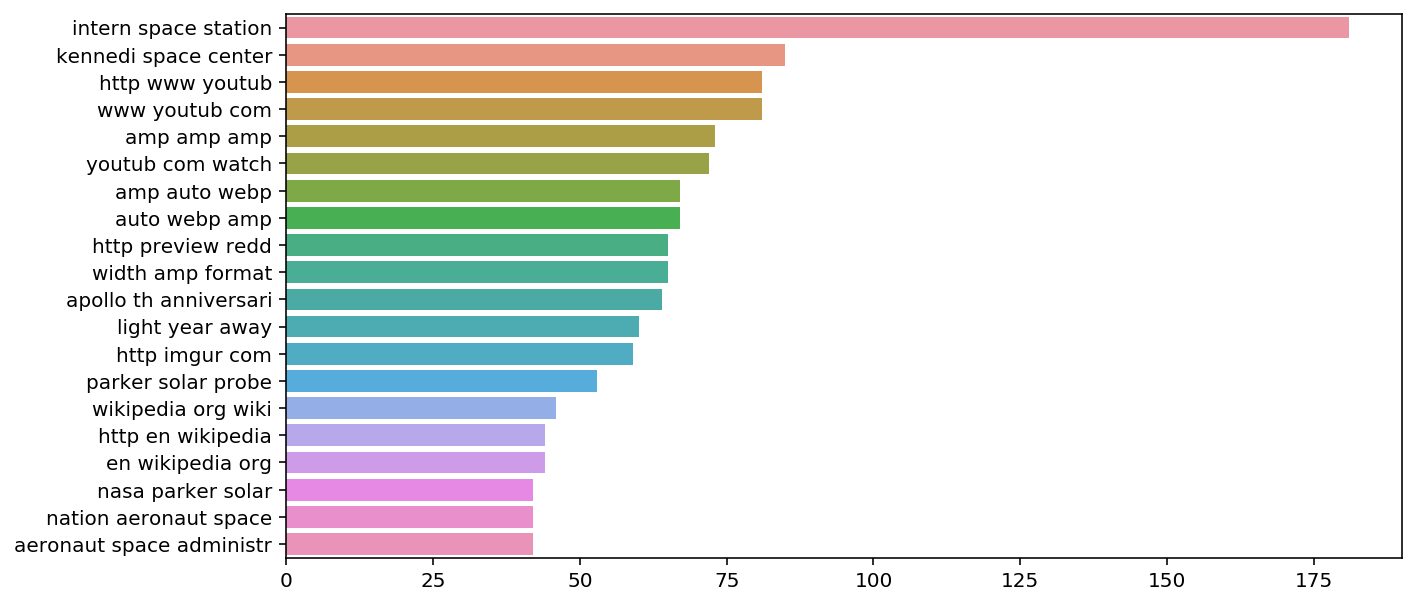

In [35]:
top_tri_grams=get_top_ngram(df_reddit['text_merged'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

### Topic Modeling exploration with pyLDAvis

In [39]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df_reddit['text_merged']:
        words=[w for w in word_tokenize(news) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(df_reddit)

[nltk_data] Downloading package punkt to C:\Users\DASLAB Hareland
[nltk_data]     3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DASLAB Hareland
[nltk_data]     3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# !python -m pip install -U gensim

In [45]:
from gensim import models
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [57]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.022*"apollo" + 0.020*"moon" + 0.018*"launch" + 0.017*"amp" + 0.010*"spacex" + 0.009*"year" + 0.008*"space" + 0.008*"rocket" + 0.008*"earth" + 0.007*"land"'),
 (1,
  '0.011*"space" + 0.010*"univers" + 0.009*"know" + 0.009*"time" + 0.009*"like" + 0.006*"get" + 0.006*"think" + 0.006*"want" + 0.006*"could" + 0.005*"look"'),
 (2,
  '0.015*"earth" + 0.014*"star" + 0.012*"planet" + 0.011*"nasa" + 0.011*"moon" + 0.011*"mar" + 0.010*"black" + 0.010*"hole" + 0.010*"solar" + 0.009*"sun"'),
 (3,
  '0.055*"nasa" + 0.051*"space" + 0.011*"mission" + 0.010*"astronaut" + 0.009*"station" + 0.008*"new" + 0.007*"moon" + 0.007*"intern" + 0.006*"mar" + 0.006*"work"')]

In [58]:
# !python -m pip install -U pyLDAvis

In [59]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.046369 -0.169352       1        1  33.165235
2     -0.169420  0.073139       2        1  23.572175
3      0.166027 -0.002144       3        1  23.284370
0      0.049762  0.098357       4        1  19.978220, topic_info=       Term         Freq        Total Category  logprob  loglift
33     nasa  2782.000000  2782.000000  Default  30.0000  30.0000
8     space  2996.000000  2996.000000  Default  29.0000  29.0000
52   apollo   761.000000   761.000000  Default  28.0000  28.0000
142  launch   816.000000   816.000000  Default  27.0000  27.0000
32     moon  1373.000000  1373.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
118     mar   135.813679   823.778076   Topic4  -5.5050  -0.1921
253     get   123.275097   594.853061   Topic4  -5.6018   0.0366
37   center   108.193815   285.055118   Topic4  -5.7323   0.6418
175    like   117.170898   812.980824   Topic4  -5.6526  -0.3265
292    time   114.017726   889.367851   Topic4  -5.6799  -0.4436

[326 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
376       4  0.971723       abort
231       3  0.988659   administr
589       3  0.986911       agenc
1369      1  0.160162         ago
1369      2  0.305763         ago
...     ...       ...         ...
114       4  0.325484        year
9348      1  0.993492  youlikebet
756       1  0.022143        zone
756       2  0.952134        zone
756       3  0.022143        zone

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

### Wordcloud

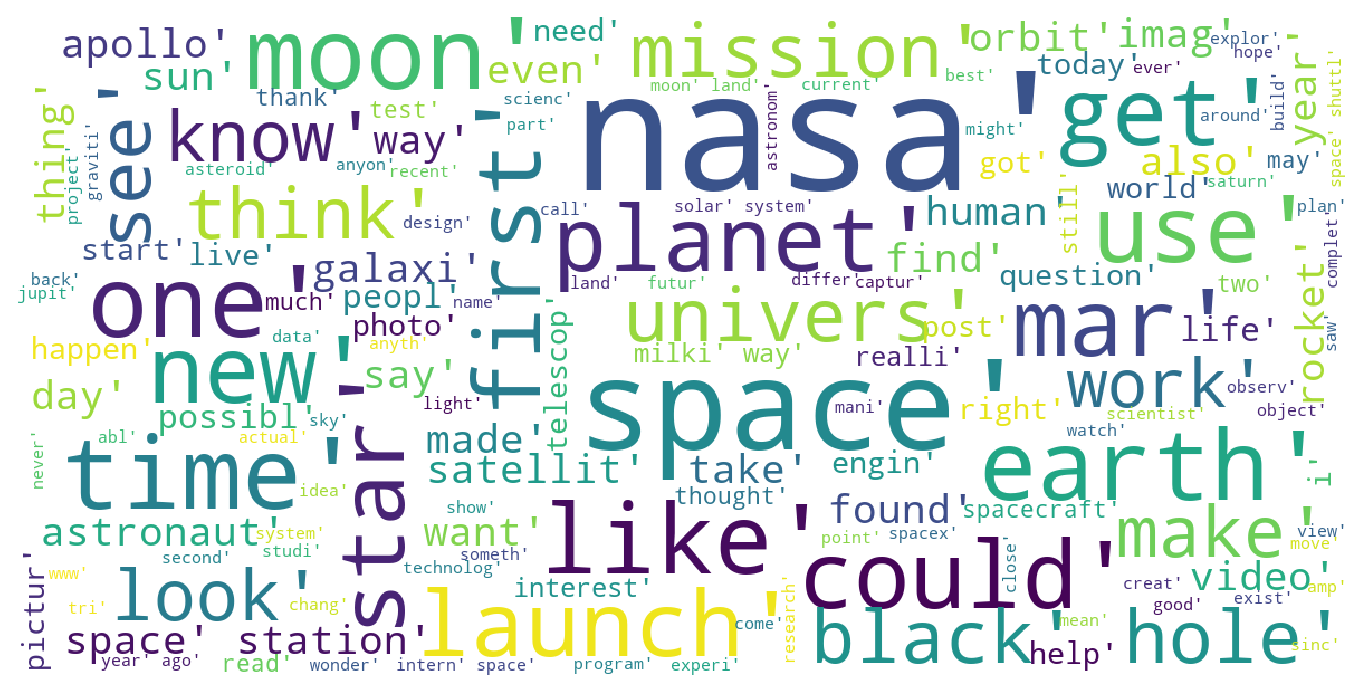

In [62]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)

In [67]:
# !pip install textblob

In [68]:
from textblob import TextBlob

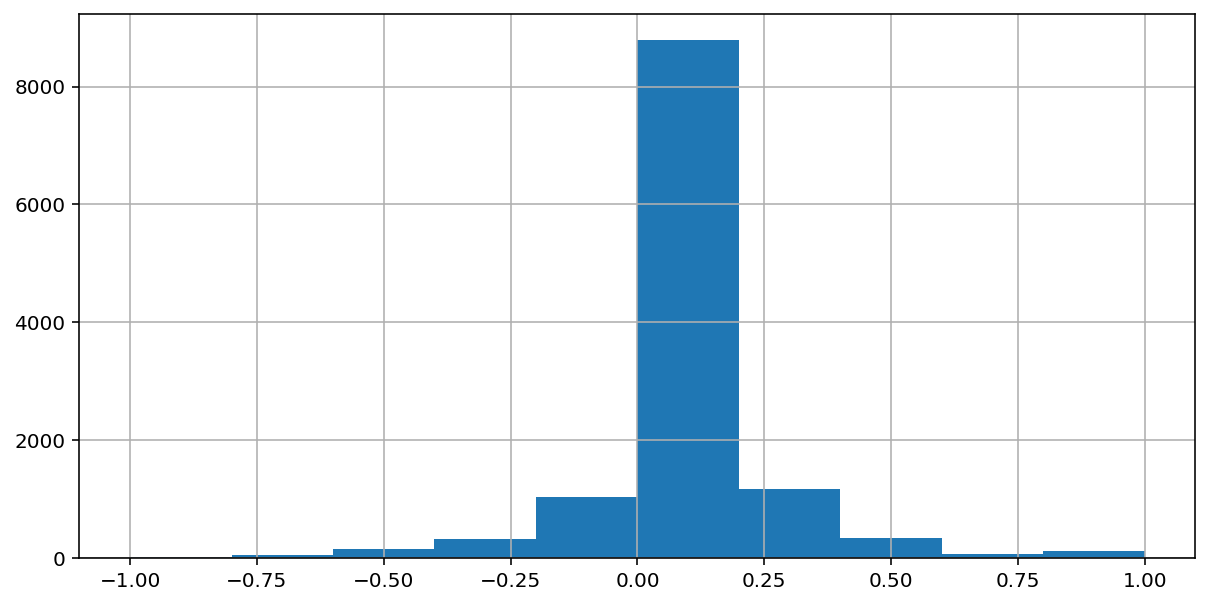

In [70]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_reddit['polarity_score']=df_reddit['text_merged'].apply(lambda x : polarity(x))

plt.figure(figsize=(10,5))
df_reddit['polarity_score'].hist()

<BarContainer object of 3 artists>

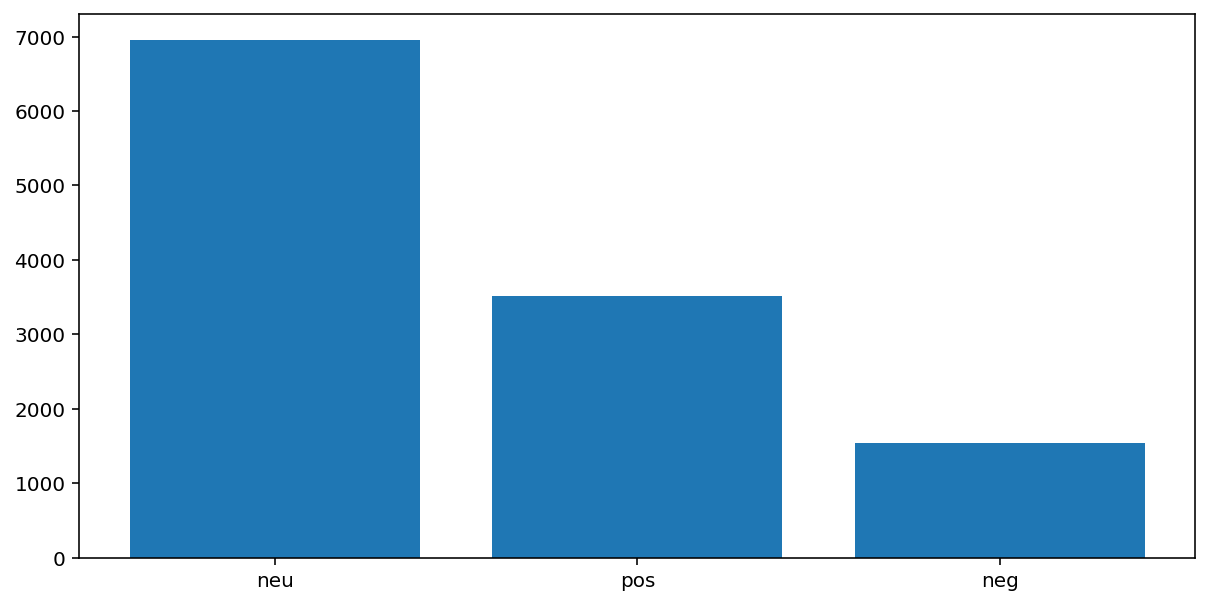

In [74]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df_reddit['polarity']=df_reddit['polarity_score'].map(lambda x: sentiment(x))

plt.figure(figsize=(10,5))

plt.bar(df_reddit.polarity.value_counts().index,
        df_reddit.polarity.value_counts())

In [36]:
pickle.dump(df_reddit, open('../DataSet/df_reddit_for_model.pkl', 'wb'))